## Module 8 - In-Class Problems

In [1]:
from IPython.display import Image
import math

<b>8.3 Baby weights, Part III.</b> We considered the variables smoke and parity, one at a time, in modeling birth weights of babies in Exercises 8.1 and 8.2. A more realistic approach to modeling infant weights is to consider all possibly related variables at once. Other variables of interest include length of pregnancy in days (gestation), mother’s age in years (age), mother’s height in inches (height), and mother’s pregnancy weight in pounds (weight). Below are three observations from this data set.

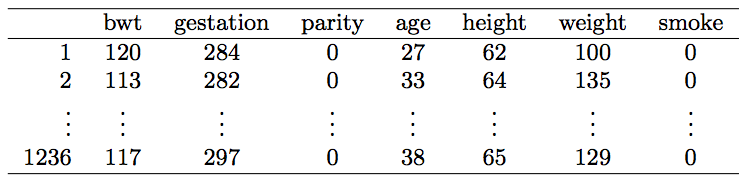

In [2]:
Image(filename='8_3_T1.png') 

The summary table below shows the results of a regression model for predicting the average birth weight of babies based on all of the variables included in the data set.

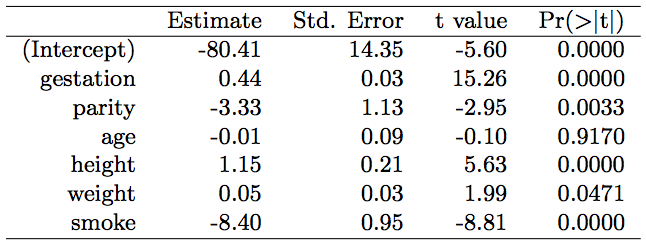

In [3]:
Image(filename='8_3_T2.png') 

<b>(a)</b> Write the equation of the regression line that includes all of the variables.

$baby\ weight = -80.41 + 0.44 \times gestation - 3.33 \times parity - 0.01 \times age + 1.15 \times height + 0.05 \times weight - 8.40 \times smoke$

<b>(b)</b> Interpret the slopes of gestation and age in this context.

Gestation has a positive slope, meaning that for every day of pregnancy, gestation increases by 0.44oz (all other variables held constant). Age has a very weak negative slope, meaning that for every day of pregnancy, mother's age is expected to decrease by 0.01 year (all other variables held constant).

<b>(c)</b> The coefficient for parity is different than in the linear model shown in Exercise 8.2. Why might there be a difference?

This could be the result of the correlation between parity and other variables excluded from the model

<b>(d)</b> Calculate the residual for the first observation in the data set.

In [4]:
res = 120 - (-80.41 + 0.44*284 - 3.33*0 - 0.01*27 + 1.15*62 + 0.05*100 - 8.4*0)
print("Residual is %.4f" % res)

Residual is -0.5800


<b>(e)</b> The variance of the residuals is 249.28, and the variance of the birth weights of all babies
in the data set is 332.57. Calculate the $R^{2}$ and the adjusted $R^{2}$. Note that there are 1,236 observations in the data set.

In [5]:
var_res = 249.28
var_bw = 332.57
n = 1236
k = 6

# Remember, R-squared = 1 - (variance in residuals / variance in birth weights)
r2 = 1 - (var_res/var_bw)

# Adjusted R-squared is R-squared (recall from last week)
r2_adj = 1 - ((1 - r2)*(n - 1) / (n - k - 1))

print("R-squared is %.4f" % r2)
print("Adjusted R-squared is %.4f" % r2_adj)

R-squared is 0.2504
Adjusted R-squared is 0.2468


<b>8.13 Baby weights, Part V.</b> Exercise 8.3 presents a regression model for predicting the average birth weight of babies based on length of gestation, parity, height, weight, and smoking status of the mother. Determine if the model assumptions are met using the plots below. If not, describe how to proceed with the analysis.

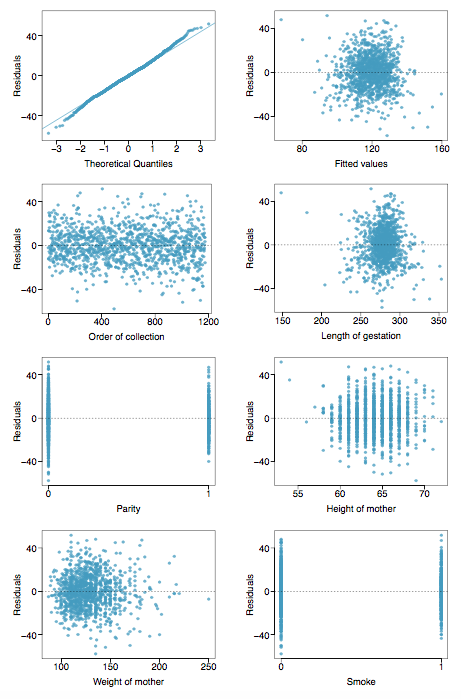

In [6]:
Image(filename='8_13_Plots.png') 

<b>Plot 1 (top left)</b> - The residuals are nearly normal. Slight deviations at the tails, although this is nothing of concern<br>
<b>Plot 2 (top right)</b> - Some slight deviation at both low and high fitted values. This appears to be a few isolated points, although we should take some caution at extreme values.<br>
<b>Plot 3 (second row, left)</b> - Residuals show no preference for order of collection.<br>
<b>Reamining plots</b> - Only lenth of gestation appears to show some ordering of residuals, all others look reasonable. Data points with very long or very short lengths of gestation may need to be removed.<br>
Overall, any concers here are not very strong. While there may be a few data points that could benefit the model by being removed, they should not introduce substantial leverage. It's not unreasonable to proceed with this model.


<b>8.15 Possum classification, Part I.</b> The common brushtail possum of the Australia region is a bit cuter than its distant cousin, the American opossum (see Figure 7.5 on page 334). We consider 104 brushtail possums from two regions in Australia, where the possums may be considered a random sample from the population. The first region is Victoria, which is in the eastern half of Australia and traverses the southern coast. The second region consists of New South Wales and Queensland, which make up eastern and northeastern Australia.<br>
We use logistic regression to differentiate between possums in these two regions. The outcome variable, called population, takes value 1 when a possum is from Victoria and 0 when it is from New South Wales or Queensland. We consider five predictors: sex male (an indicator for a possum being male), head length, skull width, total length, and tail length. Each variable is summarized in a histogram. The full logistic regression model and a reduced model after variable selection are summarized in the table.

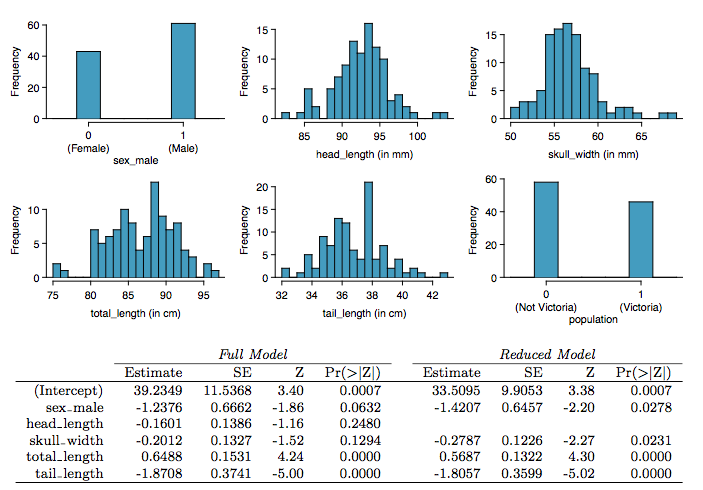

In [7]:
Image(filename='8_15_Plot_Table.png') 

<b>(a)</b> Examine each of the predictors. Are there any outliers that are likely to have a very large influence on the logistic regression model?

There appear to be outliers in the total_length and the skull_width plots. Neither of these appear to have major leverage.

<b>(b)</b> The summary table for the full model indicates that at least one variable should be eliminated when using the p-value approach for variable selection: head length. The second component of the table summarizes the reduced model following variable selection. Explain why the remaining estimates change between the two models.

This usually reflects correlation or colinearity among input variables. This is not surprising given the nature of the data, for example, size characteristics are likely highly related, and highly dependent on gender.

<b>8.17 Possum classification, Part II.</b> A logistic regression model was proposed for classifying common brushtail possums into their two regions in Exercise 8.15. The outcome variable took
value 1 if the possum was from Victoria and 0 Estimate
otherwise.

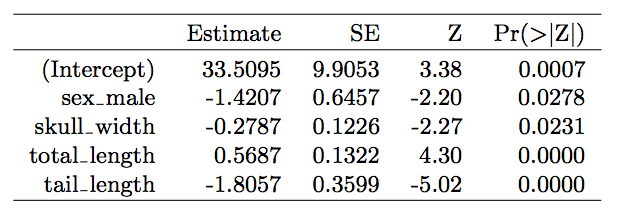

In [8]:
Image(filename='8_17_Table.png') 

<b>(a)</b> Write out the form of the model. Also identify which of the variables are positively associated when controlling for other variables.

$$log\bigg(\frac{p_{i}}{1-p_{i}}\bigg) = 33.5095 - 1.4207 \times sex\_male - 0.2787 \times skull\_width + 0.5687 \times total\_length - 1.8057 \times tail\_length$$

The only variable with a positive association is total_length

<b>(b)</b> Suppose we see a brushtail possum at a zoo in the US, and a sign says the possum had been captured in the wild in Australia, but it doesn’t say which part of Australia. However, the sign does indicate that the possum is male, its skull is about 63 mm wide, its tail is 37 cm long, and its total length is 83 cm. What is the reduced model’s computed probability that this possum is from Victoria? How confident are you in the model’s accuracy of this probability calculation?

In [9]:
sex_male = 1
skull_width = 63
tail_length = 37
total_length = 83

f_x = 33.5095 - 1.4207*sex_male - 0.2787*skull_width + 0.5687*total_length - 1.8057*tail_length
p = math.exp(f_x) / (1 + math.exp(f_x))
print("The probability that the possim is from Victoria is %.5f" % p)

The probability that the possim is from Victoria is 0.00619


This is a low probability, so according to this model we can be confident that the possum is from Victoria. However, the problem doesn't give us enough information to interrogate the model. We also don't know if the data has been collected in wild animals or zoo animals, which may affect the observations.